# Radar Aeroecology Virtual Lab tutorial

## Table of contents
1. [Background information](#introduction)
    1. [Passerines](#passerines)
    2. [Meteorological Radar](#meteorological-radar)
    3. [Approach](#approach)
2. [Exercises](#exercises)
    1. [Introduction](#introduction-1)
    2. [Exercise 1. Execute the data weather radar processing workflow and visualise the results](#Exercise-1:-Execute-the-data-weather-radar-processing-workflow-and-visualise-the-results)
3. [Open questions](#open-questions)
    1. [Fireworks and Birds](#fireworks-and-birds)
    2. [Peak migration events](#peak-migration-events-based-on-weather-variables)
4. [Publications and papers regarding migration](#publications-and-papers-regarding-migration)
5. [Open data repositories](#open-data-repositories)

This tutorial demonstrates how the Radar Aeroecology Virtual Lab simplifies obtaiing biological scatters from radar data. 
We will explore this virtual lab  using the identification of mass migration events of small passerine birds via weather radars as an example.
To understand the background, we recommend watching [this 2 minute animation](https://www.youtube.com/watch?v=BjQQeXGvYc4).
We recommend to start with the first exercise, which shows how to execute the data processing workflow and how to visualise the results. 
The other three modular exercises show how to how to adapt the virtual lab for your own purpose.

## Background information
### Passerines 
Small passerine birds migrate en masse during Spring and Fall. Passerine birds do not migrate continuously throughout the migration season but instead seemingly wait for favorable weather conditions. These weather conditions have been identified to a certain extend and as such certain moments can be defined on which peak migration would likely occur. These migration events can be significant enough to observe on Meteorological Radars. 
### Meteorological Radar
Meteorological radars monitor the sky 24/7 by emitting a beam and detecting their reflections. While these radars are primarily designed for weather observation, most airborne objects, including birds, reflect a portion of the radar's beam. This makes Meteorological radars a valuable tool for observing large-scale bird migration events. However, as meteorological radar is not purposefully built to detect small passerines, some effort has to be made to produce meaningful data. Furthermore, a device measuring 24/7 produces much more data than research institues can handle, so some pruning is required. 
### Approach
As we have a decent understanding of favorable weather conditions we can start to narrow down our search towards the few times in the year that we have favorable conditions for passerines. Furthermore, we can apply certain transformations to the data which will allow us to filter, summarize and visualize the data which will help us focus on the actual migration rather than weather phenomena. 

## Exercises
### Introduction
In this tutorial you will be introduced to some of the core principles of radar aeroecology, specifically meteorological radar data analysis. You will download meteorological radar data from the Netherands Meteorilogical Institute (KNMI) from multiple radars, process, visualize and interpret. You will be introduced to more advanced visualization techniques in R by using the `bioRad` ([paper](https://onlinelibrary.wiley.com/doi/10.1111/ecog.04028), [library documentation](https://adriaandokter.com/bioRad/articles/bioRad.html)) package. You do not have to be proficient in either Python or R to complete the introductory exercise and modular exercise 1. 

Most exercises have a `Note:` section. This section generally explains a bit more about the how and what about the block. This information is not necessary to go through the tutorial but might be interesting to read. 
RAVL has a few core components that we will re-use in the [NaaVRE's experiment manager](https://naavre.net/docs/tutorials/#compose-a-workflow) to get you started. Each exercise has a link to the relevant source code of that block. If you are interested, you are free to take a look. 

### Exercise 1: Execute the data weather radar processing workflow and visualise the results
**Recommended programming experience:** None required.  

In this exercise you will process weather radar data into biological scatter data and visualise these. You will do this by runnign a data processing workflow by and then using 'bioRad' to visualise the results. 

`Time for action:` Open [Radar_data_processing.naavrewf](./../workflows/Radar_data_processing.naavrewf) (Can be found in the directory *RAVL-virtual-lab/virtual_lab/workflows*). This is an experiment manager that has the components needed to download radar data and process it into biological scatter data. 

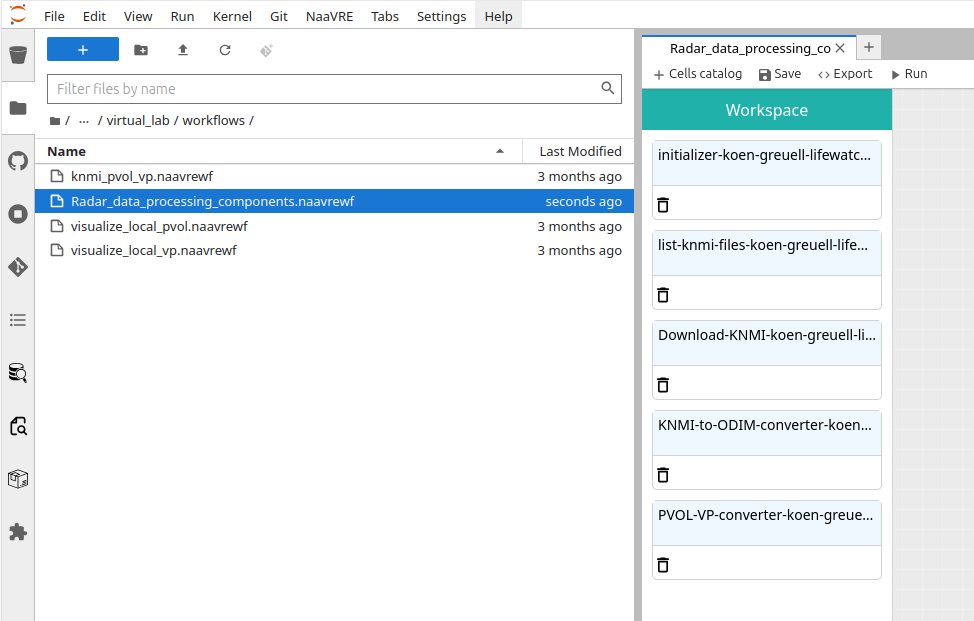

After opening the *Radar_data_processing.naavrewf* file you should see a workflow consisting of 6 components. After obtaining an API key, Let's walk through the purpose of each component.

`API Key for meteorological radar data`: The meteorological radar data we will be using in the tutorial can be requested from an API using an API key. The KNMI has provided a custom workshop API-key ([What is API?](https://www.ibm.com/topics/api)). If you are doing this tutorial outside a workshop, now is a good time to request a KNMI API key. You can request your own API key here: https://developer.dataplatform.knmi.nl/apis. key from the Dutch meteorological institute, KNMI (Koninklijk Nederlands Meteorologisch Instituut). With this key, we can authenticate ourselves within the data repository of [The KNMI Data Platform](https://dataplatform.knmi.nl/). From this platform, we will be retrieving Polar Volume Data which contains a host of parameters which can be used to detect biological echoes. 

They have done this to help us 'guarantee' to have access to the data without having to register or share the key with other anonymous users. As this is courtesy, please keep in mind to keep your queries short. Practically this means: Choose a day to retrieve data for, not a year. If you decide you want to see an effect over a large temporal time span, sample interval can be reduced. For example: every 15th day of the month, every X'th hour of the day. You do not have enough time during this course to download, convert and analyze large amounts of data nor will the API-key allow all participants to download a large dataset. Rest assured, throughout the exercises you will be guided on how to query and stay within the `fair-use policy` and still get interesting results.  

**Component 1 - Initialization:** The first component is the initializer. This component checks if everything is in place to process Polar Volume data. For instance, it makes sure it can find certain reference files in order to understand which Radars are being requested.

**Component 2 - Accessing KNMI Data Platform:** The second component communicates with the data repository of the Dutch meteorological institute, KNMI. The component asks a KNMI API which files it has for our search query. We will search by specifying three parameters: `start_date`, `end_date`, `radar`. The KNMI API will then return us (if successful) a list of file names corresponding to Radar Measurements for our query.

`Note:` The measurement interval for Dutch Meteorological Radars is 5 minutes. This means that each Radar can produce up to 288 measurements in a given day. Occasionally, radars fail to produce measurements and will therefore have less than 288 files. This code block has been adjusted such that it yields files in an interval of 15 minutes as opposed to 5 minutes. This is deliberately done in an attempt to reduce the strain on the servers and services. For research purposes it may be usefull to set the interval to 5 minutes but during the tutorial a 15 minute interval should be kept. 

**Component 3 - Download Polar Volume data:** The third component *Download-KNMI* donwloads the data from the KNMI.

**Component 4 - Converting Polar Volume data:** The files that we are downloading from the KNMI API are HDF5 files which contain Polar Volumetric data. The data is currently structured according the the [data model of KNMI](https://www.knmi.nl/kennis-en-datacentrum/publicatie/knmi-hdf5-data-format-specification-v3-5). Most of our analysis methods expect a data model of [ODIM](https://www.eumetnet.eu/wp-content/uploads/2019/01/ODIM_H5_v23.pdf) which means we need to run a converter. This component will call a converter to convert the KNMI format to an ODIM format and returns us a list of files in ODIM format.

`Note:` This component executes a subprocess call to a custom C program written by [Hidde Leijense](https://www.knmi.nl/research/publications?author=+Hidde+Leijnse) of KNMI. Hidde Leijense is often involved in Research with the Animal Movement Ecology of the University of Amsterdam as the KNMI and UvA collaborate frequently.
We only convert the structure of data, not the file type. Both the KNMI and ODIM use the same filetype, [HDF5](https://www.hdfgroup.org/solutions/hdf5/). HDF5 is an industry standard hierarchial data storage. 

**Component 5 - Producing vertical profiles:** We have all the components in place to search, download, convert Polar Volume (PVOL) data into a format that we can start analyzing but also process further into more derivatives, such as a vertical profile. A Vertical Profile (VP) is a way for us to 'summarize' the large amount of data that the Polar Volume shows us. A Polar Volume of The KNMI can have up to 16 different parameters measured per elevation angle (step). Each Radar measures a number of elevation (steps). For that elevation, it measures a host of different quantities and returns those as datasets per quantity and elevation angle. For us to interpret all those elevation angles and quantities is extremely difficult. 

To alleviate this difficulty, a Vertical Profile can be generated using the vol2bird algorithm which analyses relevant quantities and elevation angles and attempts to determine the number of birds that have passed over an imaginary cross-section across the radar. It produces that information in a format which indicates per height bin a number of metrics. These metrics include the reflectivity in that specific bin, the expected number of birds / area and so on. The [github page of Vol2bird](https://github.com/adokter/vol2bird) contains more information on vol2bird and includes links to publications explaining how vol2bird works. 

`Note: Naming conventions` There is a lot of Python code involved here. Most of this code is applying naming conventions and versioning. The AME group of the University of Amsterdam has over 5.5 million Vertical Profiles stored in two (synchronized) storage systems. In order to provide overview and structure a strong naming convention has been enforced within the AME group to great success.



`Note:` There are three types of parameters recognized by NaaVRE Code analyzer: `secret`, `param` and `conf`. The keyword `param` signifies that the user needs to supply this information when a workflow is executed. This could be a name of a Radar, a date, etc. The keyword `conf` signifies that it holds information publicly shared. You would not enter your password here as it would be public to the world. You would use `conf` to indicate where your storage is located, what your maximum number of files needs to be, etc. And lastly, `secret` is a parameter that NaaVRE extra care on how to store and share the contents. This is to avoid that anyone else but you has access to critical information, such as your password. 



### Exercise 6. Creating the workflow
Now we have a few functional blocks that we can start to connect. Click the '+' on the top to create a new tab. This tab should have an option called `experiment manager`. Click the `experiment manager` and open the cell catalogue on the right (click `+`). From the cell catalogue pick the following cells:

```
1. List-KNMI-files-v30
2. Download-KNMI-files-v30
3. Converter-KNMI-files-v30
4. PVOL-VP-processor-v30
```

These blocks will now be made available to you in the `experiment manager`. We can now start to connect the individual blocks and to allow the NaaVRE environment to transfer the information between each block and handle its execution. In the previous exercises we had to specify which input and output variables each block had. Now, we can draw lines between all input and output of each block. 

Connect all blocks in a fashion such that the following workflow is created: 

```
Initializer -> List-KNMI-files -> Download-KNMI-files -> Converter-KNMI-files -> PVOL-VP-processor
```

### Exercise 7. Producing data
We now have a functional workflow which can retrieve and process any Radar data from the Herwijenen or Den Helder Meteorological Radars. We will now configure our workflow in such a manner that we will zoom in on a known mass migration event. The mass migration event was logged by [Judy Shamoun-Baranes](https://www.uva.nl/profiel/s/h/j.z.shamoun-baranes/j.z.shamoun-baranes.html) head of Animal Movement Ecology, University of Amsterdam.

Now, once we submit the workflow we will be prompted for the following information: Start date, end date, radar and API key. Fill in the following information:

`radar` = `denhelder`

`start_date` = `2022-10-10T18:00+00:00`

`end_date` `2022-10-11T06:00+00:00`

`api_key` = `yourapikey`

Execute your workflow by by pressing the `+` button and click the `Execute workflow` button. 

### Exercise 8. Visualizing data
The most convenient way to visualize radar data is by using the library bioRad, written in R. We can use the Jupyter notebook to create an R session which has bioRad installed. Click the `+` button on the top right and start a new R notebook. Paste the code in the R notebook cell and run it. 

```R
# Load bioRad
library('bioRad')
# Specify the location of where Vertical Profiles are stored
vp_dir <- "/home/joyvan/data/vp/"
# Return the file paths
vp_file_paths <- list.files(vp_dir, full.name = TRUE, pattern = "*.h5", recursive = TRUE)
# Read the file paths and generate a list of Vertical Profile Objects
vp_list <- bioRad:::read_vpfiles(vp_file_paths)
# convert the list of vertical profiles into a time series:
vpts <- bind_into_vpts(vp_list)
# regularize VPTS
reg_vpts <- regularize_vpts(vpts)
plot(reg_vpts)
```

The code generates a Vertical Profile Time Series which indicates per height bin a number of birds / km3. The library bioRad is usefull library to analyze and interact with Radar Data and derivatives. The data you've produced can be analyzed with the bioRad package. [RadAero2022](https://adriaandokter.com/bioRad/articles/rad_aero_22.html) are introductory exercises on bioRad where you will be reading Polar Volumes, Vertical Profiles generating and Range Bias Corrected data. All data generated in this course can be used in the RadAero2022 exercises in biRad. You can skip downloading vertical profiles and polar volumes in the RadAero2022 exercises as you have just generated those in your RAVRE environment. It is recommended to have a look and try some of these commands on the data you've just produced. Try creating a Plan Position Indicator from one of the Polar Volumes you've generated. 

### Modular exercise 1: Run the workflow for peak migration dates 
**Recommended programming experience:** None required.    

In this exercise you will be guided to choose a moments in time to determine if you can witness a peak migration event.



### Modular exercise 2: Create a workflow with the created visualization, to create multiple images. 
**Recommended programming experience:** Moderate, you will need to write a loop in R.  



### Modular exercise 3: Create a data import from another data source. 
**Recommended programming experience:** Demanding, you will need to write an API call.



# Extra content, to be built into exercises

## After bioRad interactive on Jupyter, text that can accompany for the containerization
On the left hand side, you can see the `component containeriser`. This allows us to store the code we just entered in the notebook as a code-block. We will eventually make a few more of these code-blocks and use them to make a workflow out of them. Click the `component containeriser` and containerise the code. Now your code cell is configured and you can go ahead and press `Create`. It will take a few minutes before it shows up in our cell catalogue. Instead of waiting, we are going to continue adding some more blocks.

# Open questions
## Fireworks and Birds. 
Quite some research is being done to determine the effect and scope of fireworks on birds. I think we can all imagine the effect fireworks has on birds - but can we see this effect in Radar Data?

Objective: Generate Polar Volumes and Vertical Profiles for either (or both) radars around New Years Eve. 

First, visualize and interpret one New Years Eve. Once done - create a larger temporal span (i.e. include more years) and interpret the effect of fireworks on birds over the year. 
* Is the effect of Fireworks increasing, decreasing, other?
* What happened during the recent Corona Pandemic. Did we see an increase, decrease, other effect? 
  1. During the Corona Pandemic, The Netherlands banned the use of all fireworks by it's citizens. 
  2. During 'normal' years The Netherlands allows its citizens to be launch a great variation of fireworks. 

### Extra information
You can e-mail your findings to `b.c.wijers@uva.nl` with the title `Lifewatch Summerschool 2023 RAVRE - Fireworks`. We will then discuss your findings with the Animal Movement Ecology group and provide feedback. 

## Peak migration events based on Weather variables
As mentioned in the introduction, it seems that birds tend to wait for favourable weather conditions before departing. Sometimes it takes too long to find these weather conditions and the birds depart in seemingly bad conditions. Therefore, we can't fully say when they depart but we can have a good estimate of when could be a good moment. By reviewing weather variables we can therefore estimate when birds could be departing en masse. 

Objective: Use weather variables to estimate when there would be a peak migration event. Once identified, generate PVOL and VP and visualize the results. 

### Information
The website you can use to view a host of weather variables can be found here: [earth.nullschool.net](https://earth.nullschool.net/#2017/07/26/2200Z/wind/surface/level/orthographic=7.88,51.69,2762/loc=7.511,49.824). For Autumn migration, winds originating from the North and heading South, SouthWest seem to be favourable for passerine migration. In Spring (February - May) winds originating from the South and heading North NorthEast seem to be favourable. Furthermore, regardless of season rain is not favourable. 

To get you started, a few dates will be shown to you of where there is a peak migration event positive weather variables. Try some of the dates and see if you can see the favourable wind conditions. Also see what the wind direction was before the 8th of october and after the 13th of october. After that, use the earth.nullschool.net website to find more moments in time that could warrant peak migration. Pick one and visualize and verify.

Night of 8th of October, 2022
```python
start_date = '2022-10-08T18:00:00+00:00'
end_date = '2022-08-09T06:00:00+00:00'
radar = 'herwijnen' # denhelder not available
```
Night of 9th of October, 2022
```python
start_date = '2022-10-09T18:00:00+00:00'
end_date = '2022-08-10T06:00:00+00:00'
radar = 'herwijnen' # denhelder not available
```
Night of 10th of October, 2022
```python
start_date = '2022-10-10T18:00:00+00:00'
end_date = '2022-08-11T06:00:00+00:00'
radar = 'herwijnen' # or denhelder
```
Night of 11th of October, 2022
```python
start_date = '2022-10-11T18:00:00+00:00'
end_date = '2022-08-12T06:00:00+00:00'
radar = 'herwijnen' # or denhelder
```
Night of 12th of October, 2022
```python
start_date = '2022-10-12T18:00:00+00:00'
end_date = '2022-08-13T06:00:00+00:00'
radar = 'herwijnen' # or denhelder
```
This night specifically is rather spectacular and has very telling weather variables before and during.
Night of 18th of Ocotber, 2022
```python
start_date = '2021-10-18T18:00:00+00:00'
end_date = '2022-08-19T06:00:00+00:00'
radar = 'herwijnen' # or denhelder
```
The following dates are peak migration nights but the weather variables are not favourable. Have a look at these dates and also look at the weather variables before and after the migration. We expect the birds to have left as they waited long enough and decided to migrate in less optimal conditions. 
Night of 6th of Ocotber, 2021
```python
start_date = '2021-10-06T18:00:00+00:00'
end_date = '2022-08-07T06:00:00+00:00'
radar = 'herwijnen' # or denhelder
```
Night of 7th of Ocotber, 2021
```python
start_date = '2021-10-07T18:00:00+00:00'
end_date = '2022-08-08T06:00:00+00:00'
radar = 'herwijnen' # or denhelder
```
Night of 8th of Ocotber, 2021
```python
start_date = '2021-10-08T18:00:00+00:00'
end_date = '2022-08-09T06:00:00+00:00'
radar = 'herwijnen' # or denhelder
```
Night of 12th of Ocotber, 2021
```python
start_date = '2021-10-06T18:00:00+00:00'
end_date = '2022-08-07T06:00:00+00:00'
radar = 'herwijnen' # or denhelder
```
Night of 13th of Ocotber, 2021
```python
start_date = '2021-10-06T18:00:00+00:00'
end_date = '2022-08-07T06:00:00+00:00'
radar = 'herwijnen' # or denhelder
```

### Extra information
You can e-mail your findings to `b.c.wijers@uva.nl` with the title `Lifewatch Summerschool 2023 RAVRE - Peak migration`. We will then discuss your findings with the Animal Movement Ecology group and provide feedback. 

# Publications and papers regarding migration
* Kranstauber B, Bouten W, van Gasteren H, Shamoun-Baranes J. 2022. Ensemble
predictions are essential for accurate bird migration forecasts for conservation
and flight safety. Ecological Solutions and Evidence 3(3)
* van Dobben H, 1953. Bird migration in the Netherlands. Ibis (95)
* van Doren BM, Horton KG. 2018. A continental system for forecasting bird migration.
Science 361:1115–1118.
* Richardson WJ. 1978. Timing and Amount of Bird Migration in Relation to Weather:
A Review. Oikos 30:224–272.

# Open data repositories
* Vertical profiles in Europe
    * [aloftdata](https://aloftdata.eu/)
* Polar Volume data The Netherlands
    * [knmi](https://data.knmi.nl)
* Polar Volume data Germany
    * [dwd](https://opendata.dwd.de/)
* Polar Volume Data Danmark
    * [dmi](https://confluence.govcloud.dk/display/FDAPI)
